ASSIGNMENT - HOUSE PRICE PREDICTION MODEL 
CARLOS REY PINTO C0868575

In [2]:
#Importing libraries needed 

#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


# models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


# metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay

import warnings
warnings.simplefilter("ignore")

**1. DATA COLLECTION**

In [3]:
#Reading dataset using pandas 
df = pd.read_csv('Housing Price data set.csv')


In [4]:
#Setting max of columns to visualize 
pd.set_option("display.max_columns",None)

#Looking the dataset
df

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no


In [5]:
# Dataset size 
df.shape

(546, 13)

In [6]:
# Feature information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  546 non-null    int64  
 1   price       546 non-null    float64
 2   lotsize     546 non-null    int64  
 3   bedrooms    546 non-null    int64  
 4   bathrms     546 non-null    int64  
 5   stories     546 non-null    int64  
 6   driveway    546 non-null    object 
 7   recroom     546 non-null    object 
 8   fullbase    546 non-null    object 
 9   gashw       546 non-null    object 
 10  airco       546 non-null    object 
 11  garagepl    546 non-null    int64  
 12  prefarea    546 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 55.6+ KB


In [7]:
df.isna().sum()

Unnamed: 0    0
price         0
lotsize       0
bedrooms      0
bathrms       0
stories       0
driveway      0
recroom       0
fullbase      0
gashw         0
airco         0
garagepl      0
prefarea      0
dtype: int64

Doesnt exist null values in the dataset

LOOKING FOR DUPLICATES 

In [8]:
#Looking for duplicates in the dataset 
df.duplicated().sum()

0

Doesnt exist duplicate values in the dataset

In [9]:
# Statistics of the data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99])

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,garagepl
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,273.500000,68121.597070,5150.265568,2.965201,1.285714,1.807692,0.692308
std,157.760895,26702.670926,2168.158725,0.737388,0.502158,0.868203,0.861307
min,1.000000,25000.000000,1650.000000,1.000000,1.000000,1.000000,0.000000
5%,28.250000,35000.000000,2565.000000,2.000000,1.000000,1.000000,0.000000
25%,137.250000,49125.000000,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,273.500000,62000.000000,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,409.750000,82000.000000,6360.000000,3.000000,2.000000,2.000000,1.000000
90%,491.500000,105000.000000,7980.000000,4.000000,2.000000,3.000000,2.000000
95%,518.750000,120000.000000,9000.000000,4.000000,2.000000,4.000000,2.000000


In [10]:
#Changing name of Unnamed:0 feature to house_id 
df.rename(columns={'Unnamed: 0': 'house_id'}, inplace=True)

In [11]:
#Checking change made 
df.head()

,house_id,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


In [12]:
#Looking for numerical values 
nunerical_columns = df.select_dtypes(exclude = object).columns

In [13]:
cat_columns = df.select_dtypes(include=['object'])
print("Categorical columns:")
print(cat_columns.columns)

Categorical columns:
Index(['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea'], dtype='object')


LOKING FOR OUTLIERS IN THE NUMERICAL CATEGORIES

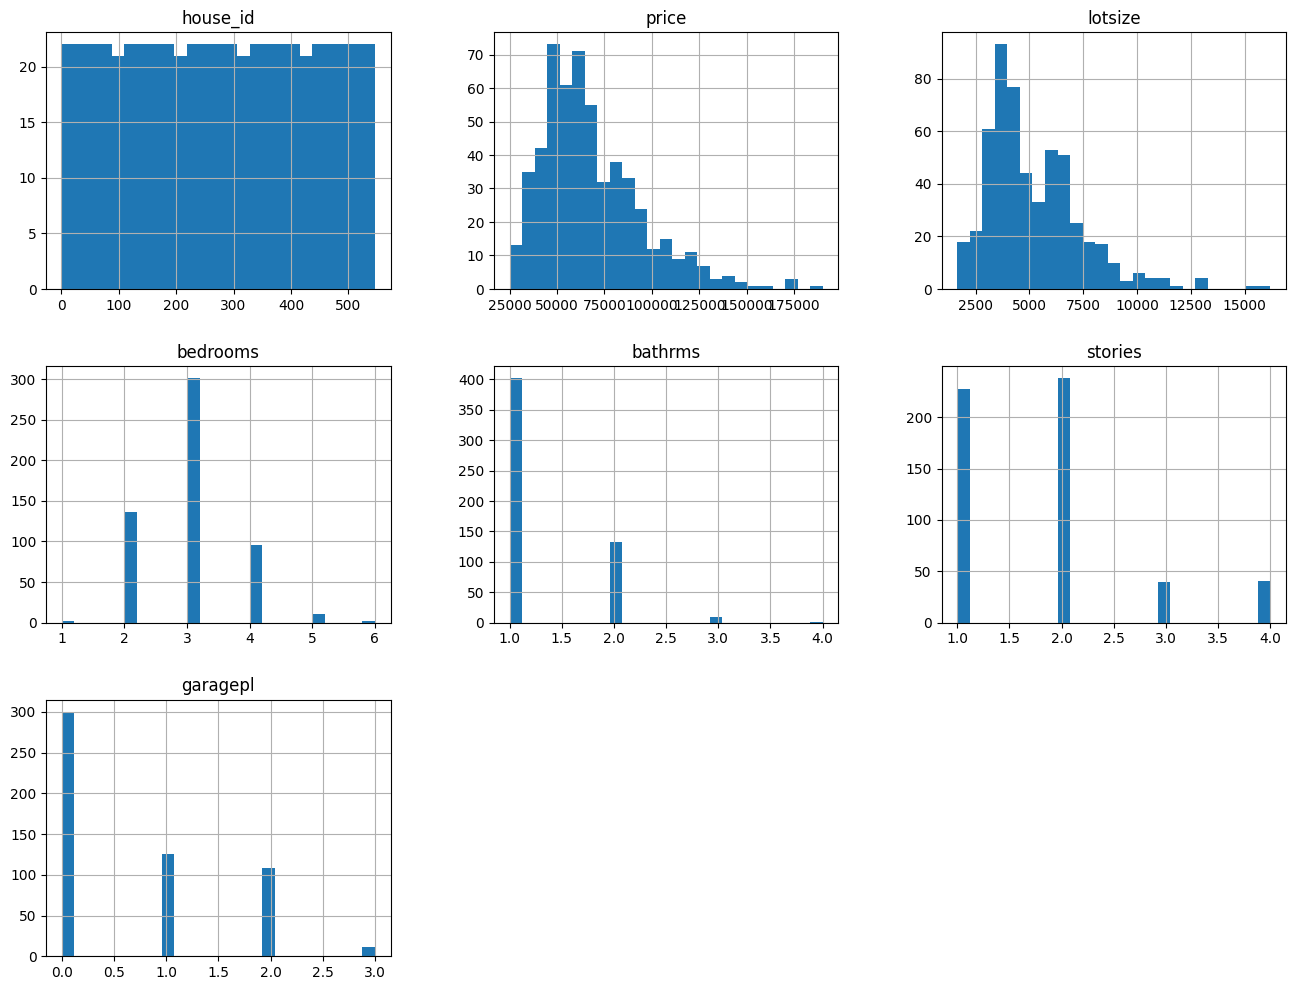

In [14]:
#Visualizing the distribution of data by columns

#Creating the histogram 
df.hist(bins=25, figsize=(16, 12))

#Showing the histogram created 
plt.show()

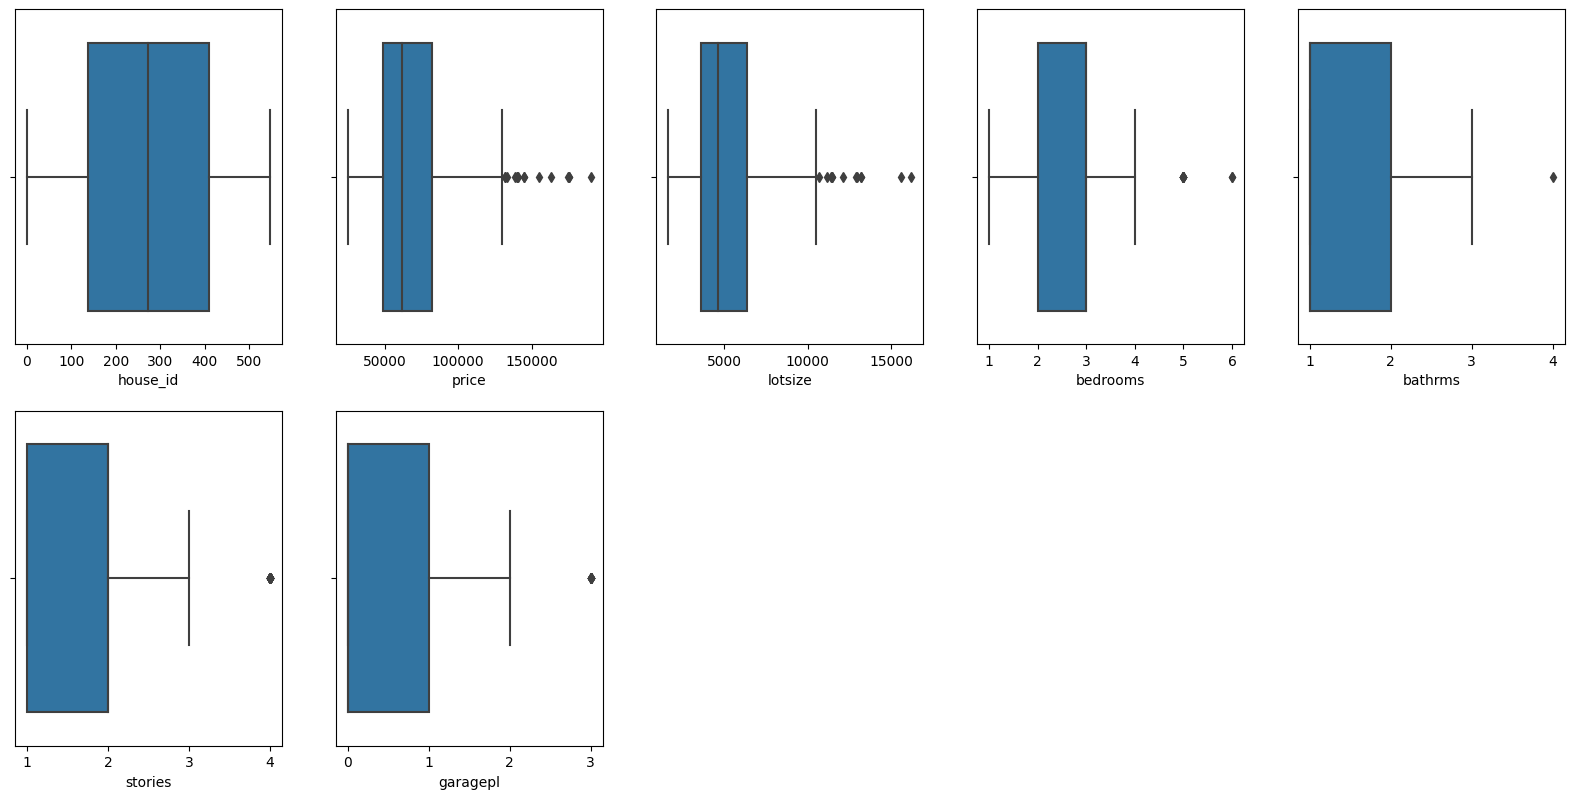

In [15]:
#Plotting boxplots to visualize outliers

#Creating the main graph
fig = plt.figure(figsize=(20,20))

#Creating the boxplots for each column in subplots inside the main graph.
c=1
for col in nunerical_columns:
    plt.subplot(4,5,c)
    g = sns.boxplot(x=col, data=df)
    c = c + 1

In [16]:
#Describing skewness by column

# Selecting only numeric columns
numeric_columns = df.select_dtypes(include=np.number)

# Calculating skewness for each numeric column
skewness_by_column = numeric_columns.skew().sort_values(ascending=False)

# Displaying skewness by column
skewness_by_column

bathrms     1.592096
lotsize     1.322758
price       1.209829
stories     1.074657
garagepl    0.844808
bedrooms    0.495872
house_id    0.000000
dtype: float64

I do not consider that the outliers in this dataset should be treated, since they are values that may be real and legitimate.

In [17]:
# Getting the column names that are of object type (categorical)

# Counting of unique values
for col in cat_columns:
    print(df.groupby(col).size())



driveway
no      77
yes    469
dtype: int64
recroom
no     449
yes     97
dtype: int64
fullbase
no     355
yes    191
dtype: int64
gashw
no     521
yes     25
dtype: int64
airco
no     373
yes    173
dtype: int64
prefarea
no     418
yes    128
dtype: int64


In all the categorical columns we find that the values they take are yes or no. Later this data will be treated with encoding techniques.

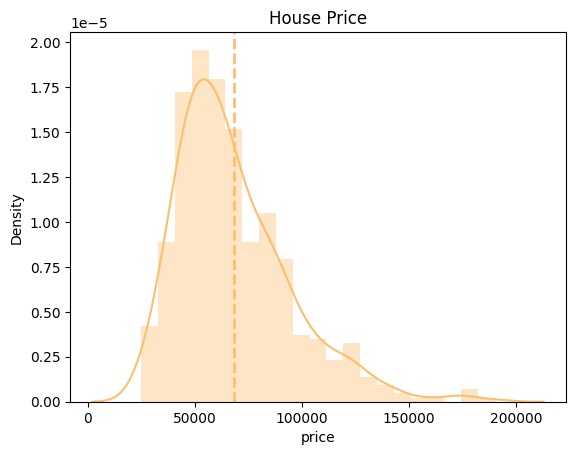

In [18]:
#Visualization of the target variable to see distribution

colors = sns.color_palette('Paired')
sns.distplot(df['price'], color=colors[6])
plt.axvline(x=df['price'].mean(), color=colors[6], linestyle='--', linewidth=2)
plt.title('House Price');

**2. FEATURE SELECTION AND ENGINEERING**

ENCODING TECHNIQUES TO CATEGORIAL COLUMNS

Im going to use label encoding for all those categorical values that we already check before. 

In [19]:
#Label encoding to categorical features
for column in cat_columns:
    label_encoder = LabelEncoder()
    df[column + '_encoded'] = label_encoder.fit_transform(df[column])

In [20]:
#Checking changes: 

df

,house_id,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,driveway_encoded,recroom_encoded,fullbase_encoded,gashw_encoded,airco_encoded,prefarea_encoded
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no,1,0,1,0,0,0
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no,1,0,0,0,0,0
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no,1,0,0,0,0,0
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no,1,1,0,0,0,0
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,542,91500.0,4800,3,2,4,yes,yes,no,no,yes,0,no,1,1,0,0,1,0
542,543,94000.0,6000,3,2,4,yes,no,no,no,yes,0,no,1,0,0,0,1,0
543,544,103000.0,6000,3,2,4,yes,yes,no,no,yes,1,no,1,1,0,0,1,0
544,545,105000.0,6000,3,2,2,yes,yes,no,no,yes,1,no,1,1,0,0,1,0


DROPPING REDUNDANT FEATURES

In [21]:
df = df.drop(columns=['driveway','recroom','fullbase',	'gashw','airco','prefarea', 'house_id'])


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             546 non-null    float64
 1   lotsize           546 non-null    int64  
 2   bedrooms          546 non-null    int64  
 3   bathrms           546 non-null    int64  
 4   stories           546 non-null    int64  
 5   garagepl          546 non-null    int64  
 6   driveway_encoded  546 non-null    int32  
 7   recroom_encoded   546 non-null    int32  
 8   fullbase_encoded  546 non-null    int32  
 9   gashw_encoded     546 non-null    int32  
 10  airco_encoded     546 non-null    int32  
 11  prefarea_encoded  546 non-null    int32  
dtypes: float64(1), int32(6), int64(5)
memory usage: 38.5 KB


<Axes: >

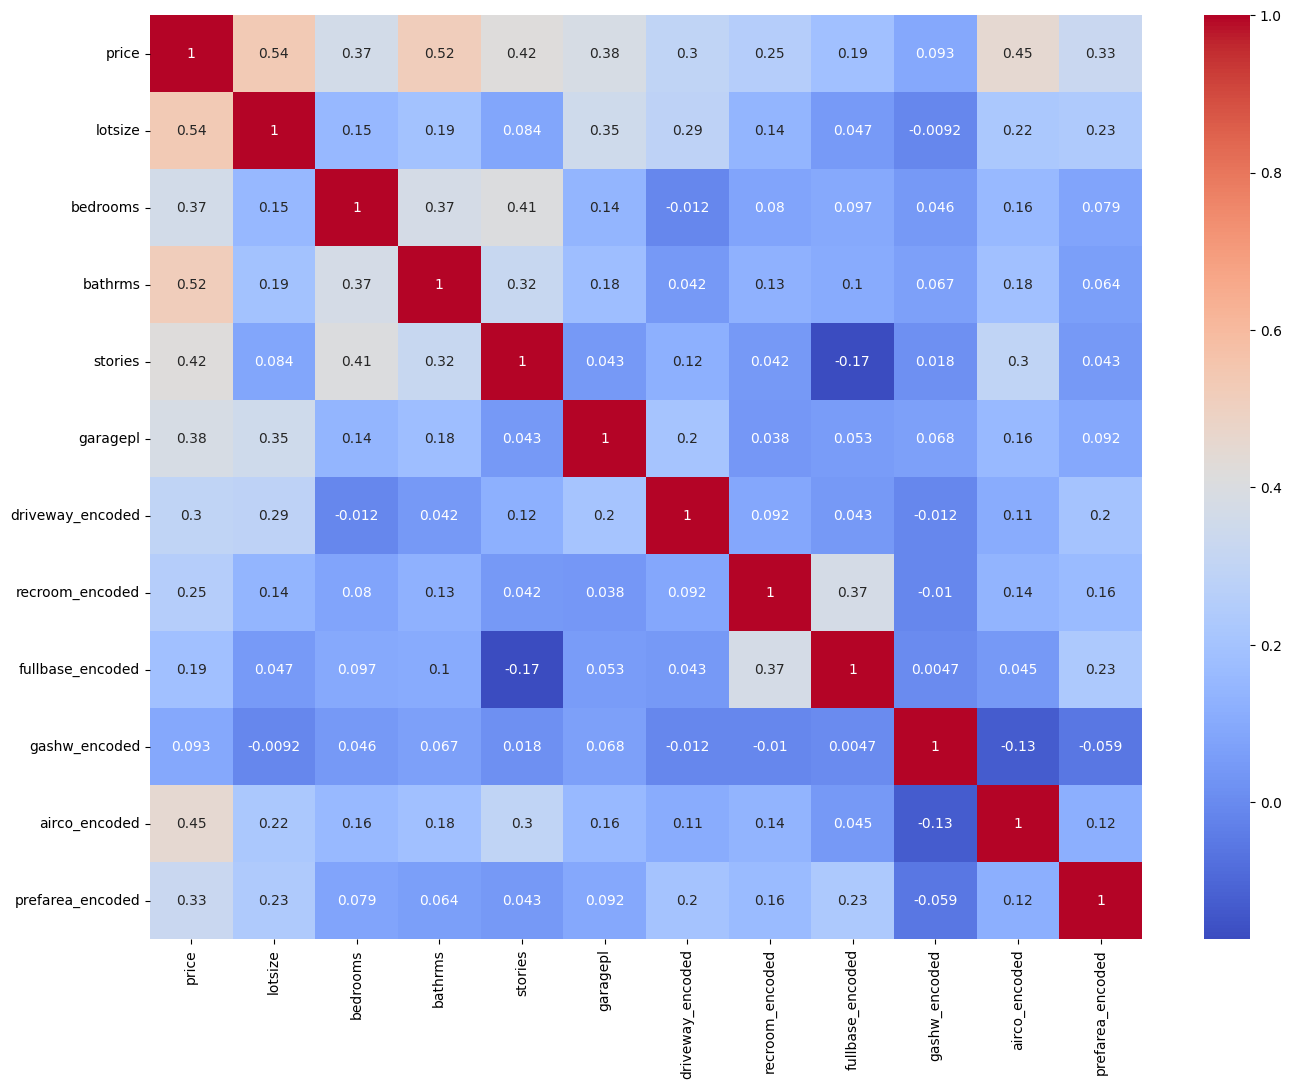

In [23]:

fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True, ax=ax)

<Figure size 1000x800 with 0 Axes>

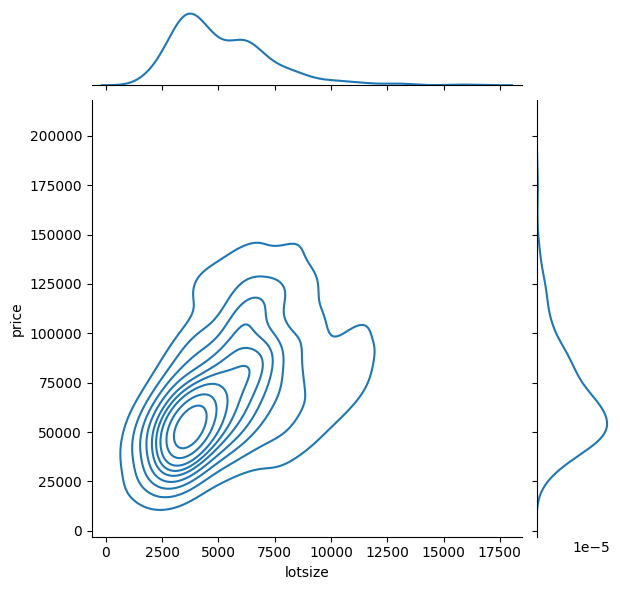

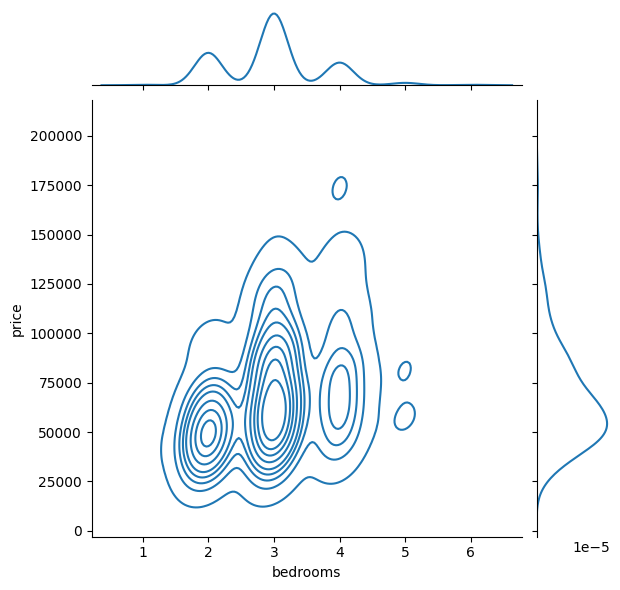

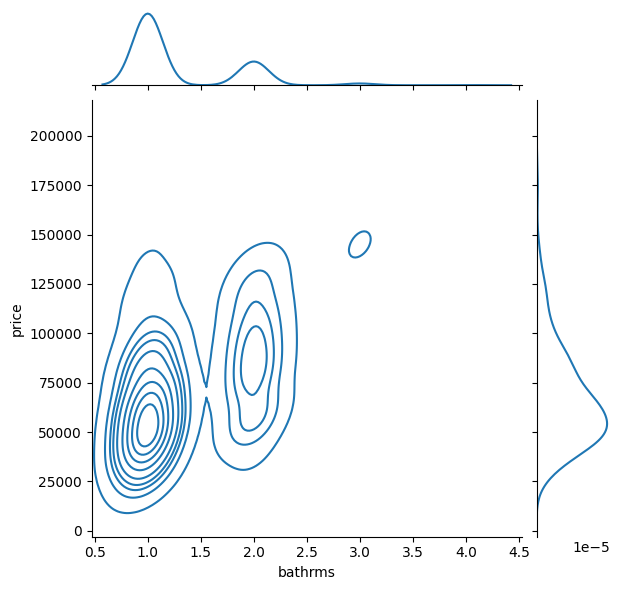

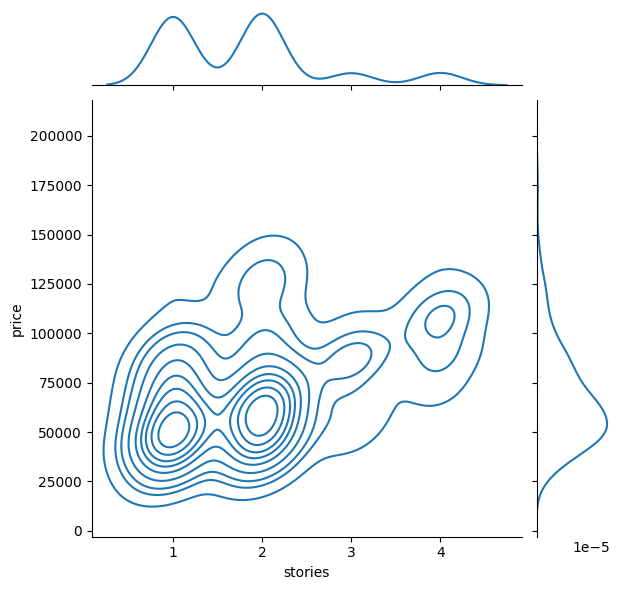

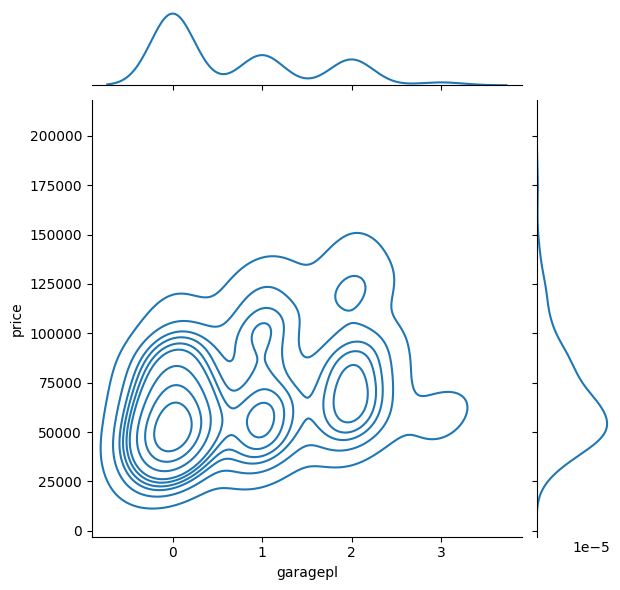

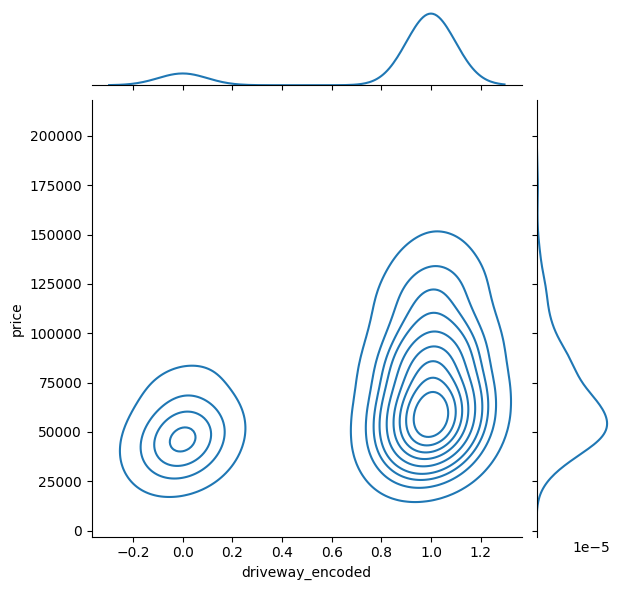

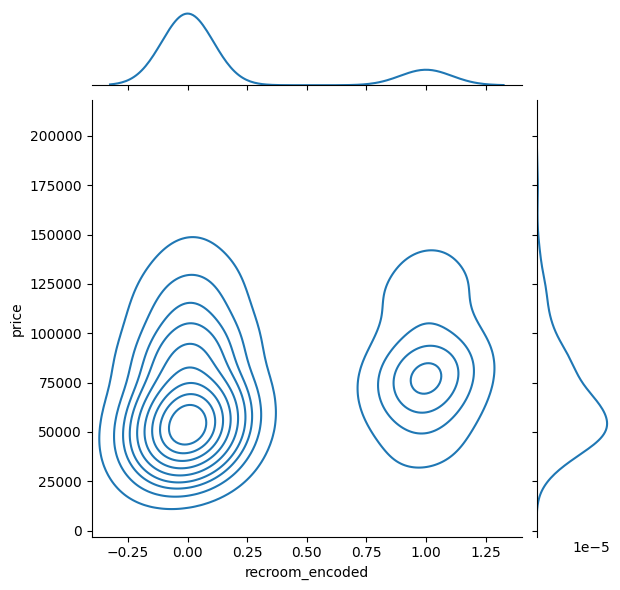

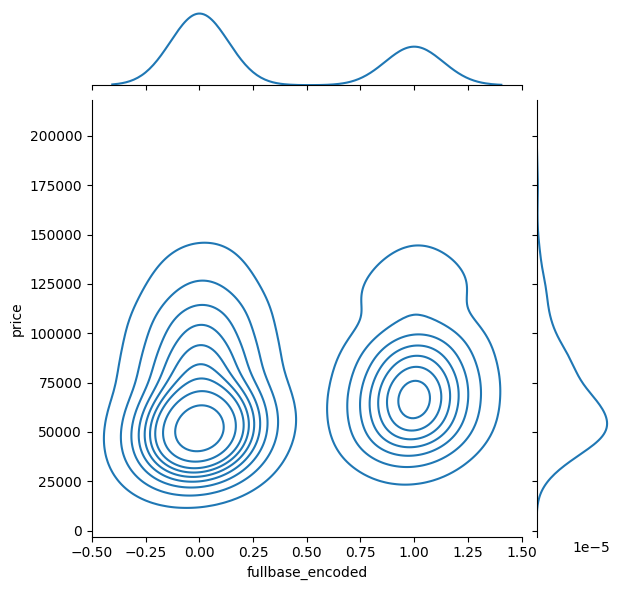

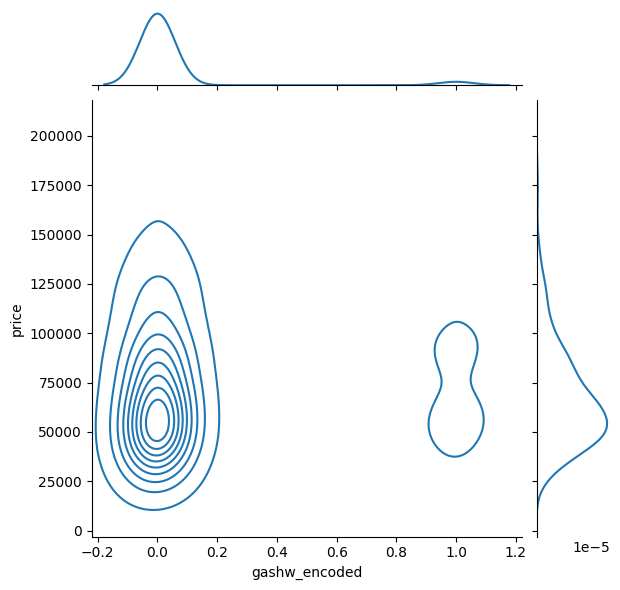

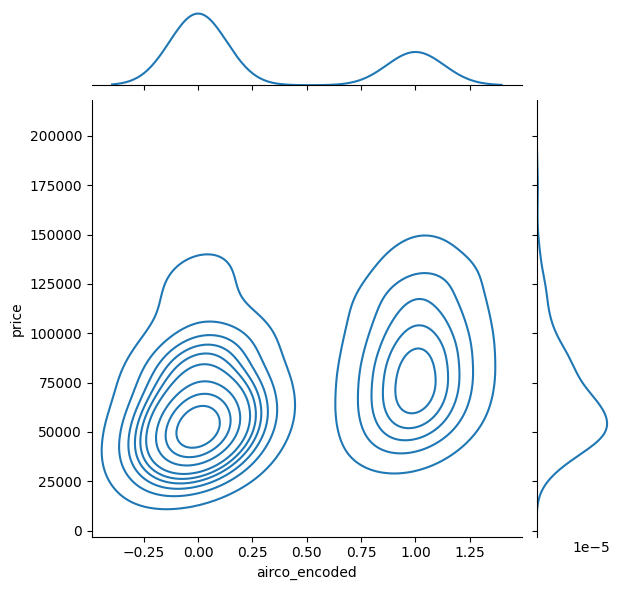

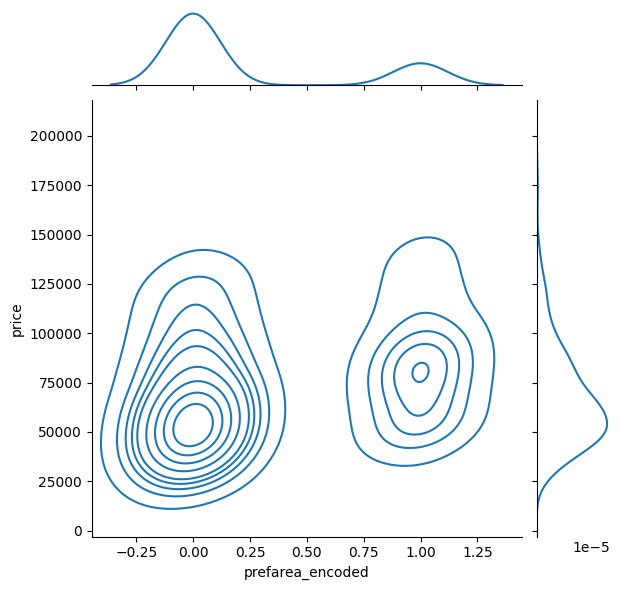

In [24]:
plt.figure(figsize=(10,8))
sns.jointplot(x=df["lotsize"], y=df["price"], kind="kde")
sns.jointplot(x=df["bedrooms"], y=df["price"], kind="kde")
sns.jointplot(x=df["bathrms"], y=df["price"], kind="kde")
sns.jointplot(x=df["stories"], y=df["price"], kind="kde")
sns.jointplot(x=df["garagepl"], y=df["price"], kind="kde")
sns.jointplot(x=df["driveway_encoded"], y=df["price"], kind="kde")
sns.jointplot(x=df["recroom_encoded"], y=df["price"], kind="kde")
sns.jointplot(x=df["fullbase_encoded"], y=df["price"], kind="kde")
sns.jointplot(x=df["gashw_encoded"], y=df["price"], kind="kde")
sns.jointplot(x=df["airco_encoded"], y=df["price"], kind="kde")
sns.jointplot(x=df["prefarea_encoded"], y=df["price"], kind="kde")
plt.show()

No any other redundant or unnecessary feature to drop

**3. MODEL SELECTION** 


After doing some research, and comparing with other house price prediction work done by other users on kaggel, I decided to implement the Random Forest model, these are the arguments:

1. **Handling Complexity**: Predicting house prices involves dealing with a myriad of factors such as location, size, amenities, market trends, and economic indicators. Random Forest excels in handling such complex datasets due to its ability to generate multiple decision trees and aggregate their predictions. This allows the model to capture intricate relationships and interactions among various predictors, making it well-suited for the multifaceted nature of house price prediction.

2. **Non-linearity and Interactions**: Unlike Multiple Linear Regression, which assumes a linear relationship between predictors and the target variable, Random Forest can capture non-linear relationships and interactions effectively. In the housing market, features like location, size, and amenities may have non-linear effects on house prices, and Random Forest's flexibility allows it to accommodate such complexities without the need for manual feature engineering.

3. **Robustness to Outliers**: Real-world datasets often contain outliers and noisy data points, which can significantly impact the performance of linear models like Multiple Linear Regression. Random Forest, however, is less sensitive to outliers due to its ensemble nature. By aggregating predictions from multiple trees, Random Forest can mitigate the influence of outliers, resulting in more robust and reliable predictions.

4. **Generalization Performance**: Random Forest is known for its ability to generalize well to unseen data. By constructing an ensemble of diverse decision trees trained on different subsets of the data, Random Forest reduces the risk of overfitting and improves generalization performance. This is particularly advantageous in predicting house prices, where the model needs to perform well on new listings or in different housing markets.

5. **Automatic Feature Selection**: Random Forest inherently performs feature selection by selecting a subset of predictors for each tree in the ensemble. This can be beneficial in house price prediction, where there may be a large number of potential predictors. By focusing on relevant features, Random Forest can improve prediction accuracy and interpretability by excluding irrelevant or redundant variables.

In conclusion, Random Forest emerges as the preferred model for predicting house prices due to its ability to handle complexity, capture non-linear relationships, robustness to outliers, strong generalization performance, and automatic feature selection capabilities. These factors together make Random Forest well-suited for real-world applications in the housing market, where accurate predictions are essential for buyers, sellers, and real estate professionals alike.

**4. TRAINING**

SPLITING DATA

In [25]:
# Droping column "price" from the dataframe and assign the result to X
X = df.drop('price', axis=1)
# Extracting the column "Life expectancy" from the dataframe and assign it to y
y = df['price']

# Splitting the dataset into the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

SCALING DATA IN X MODEL 

Scaling using MinMaxScaler

In [26]:
# Applying MinMaxScaler to x models (train and test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

As in the model selection, MinMaxScaler was used after researching and comparing with other prediction models made in kaggle (references at the end)

TRAINING THE MODEL

In [27]:
# Creating and train a Random Forest regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [28]:
# Initializing lists to store results
model_name = []
RMSE = []
R2_score = []

# List of models
models = [
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    LinearRegression()
]

# Iterating over each model
for model in models:

    # Fit the model
    model.fit(X_train, y_train)
    
    # Make predictions
    prediction = model.predict(X_test)
    
    # Store the results
    
    model_name.append(model.__class__.__name__)
    
    RMSE.append(str(mean_squared_error(prediction, y_test, squared=False)))
    R2_score.append(str(r2_score(y_test, prediction) * 100) + " %")


**5. MODEL EVALUATION**

CREATING A DATAFRAME WITH THE EVALUATION RESULTS FOR EACH MODEL

In [29]:
# Creating a DataFrame with model names, RMSE, and R2 scores
models_df = pd.DataFrame({"Model-Name": model_name, "RMSE": RMSE, "R2_Score": R2_score})

# Seting the index of the DataFrame to be the 'Model-Name' column
models_df = models_df.set_index('Model-Name')

# Sorting the DataFrame by 'R2_Score' column in descending order
models_df_sorted = models_df.sort_values("R2_Score", ascending=False)
        
print(models_df_sorted)


                                     RMSE              R2_Score
Model-Name                                                     
LinearRegression       15766.778459599402   70.80978843721117 %
RandomForestRegressor   18003.74499554455  61.939278400250465 %
DecisionTreeRegressor   21467.78698891014  45.883977738818885 %


VISUALIZATION FOR MODEL COMPARISON

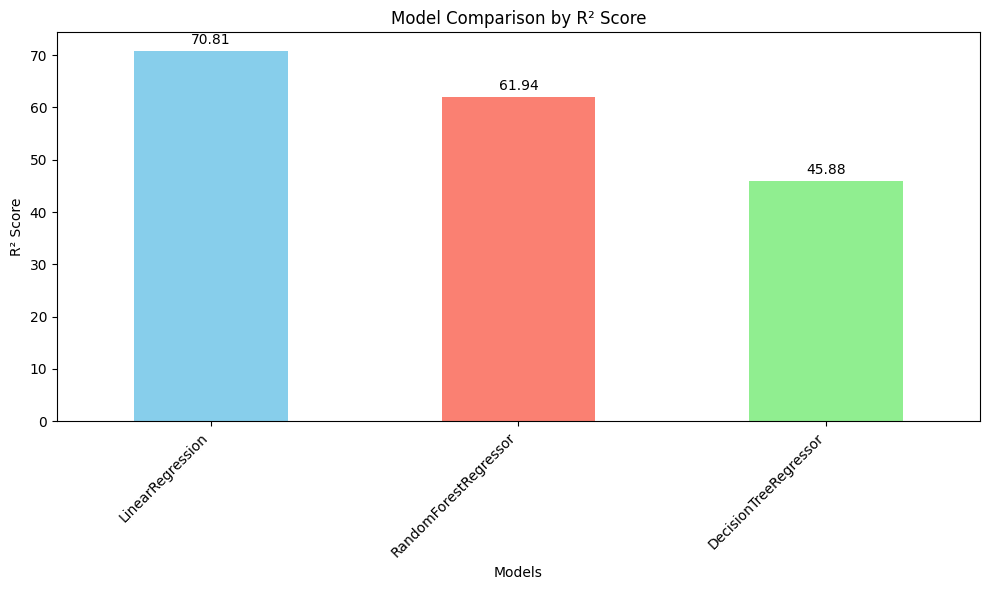

In [32]:
# Creating a figure and axes
plt.figure(figsize=(10, 6))
ax = plt.subplot()

# Colors for the bars
colors = ['skyblue', 'salmon', 'lightgreen', 'orange', 'cyan']

# Plotting R² scores with different colors
models_df_sorted['R2_Score'] = models_df_sorted['R2_Score'].astype(float)
bars = models_df_sorted['R2_Score'].plot(kind='bar', ax=ax, color=colors)

# Adding labels with R² values
for bar in bars.patches:
    ax.annotate(format(bar.get_height(), '.2f'),
                (bar.get_x() + bar.get_width() / 2,
                 bar.get_height()), ha='center', va='center',
                size=10, xytext=(0, 8),
                textcoords='offset points')

# Adding labels and title
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Model Comparison by R² Score')

# Showing the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




After evaluating and comparing the models we can conclude that the model that has the best performance is linear regression.